In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Desktop\Churn_Modelling.csv")

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.iloc[:, 3:13]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [5]:
Y = dataset.iloc[:, 13]
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [6]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
gender = pd.get_dummies(X['Gender'], drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [9]:
X = pd.concat([X,geography,gender], axis = 1)
X 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [10]:
X = X.drop(['Geography', 'Gender'], axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [11]:
dataset.shape


(10000, 14)

In [13]:
X.shape

(10000, 11)

In [14]:
#splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_test

(      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 7389          667   34       5       0.00              2          1   
 9275          427   42       1   75681.52              1          1   
 2995          535   29       2  112367.34              1          1   
 5316          654   40       5  105683.63              1          1   
 356           850   57       8  126776.30              2          1   
 ...           ...  ...     ...        ...            ...        ...   
 9225          594   32       4  120074.97              2          1   
 4859          794   22       4  114440.24              1          1   
 3264          738   35       5  161274.05              2          1   
 9845          590   38       9       0.00              2          1   
 2732          623   48       1  108076.33              1          1   
 
       IsActiveMember  EstimatedSalary  Germany  Spain  Male  
 7389               0        163830.64        0      1     0  
 9275   

In [15]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [16]:
X_train['CreditScore'].mean()

650.55

In [17]:
X_train['CreditScore'].std()

97.00941889022671

In [18]:
(667-650.55)/97.00941889022671

0.16957116317348966

In [20]:
#Feature scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

# part-2 lets make ANN
#importing all the keras libraries and packages


In [21]:
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [23]:
#intialising ANN
classifier = Sequential()
classifier

In [26]:
#adding the input layer and first hidden layer
classifier.add(Dense(units = 6, kernel_initializer='he_uniform', activation='relu', input_dim=11))


In [27]:
#adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer='he_uniform', activation='relu'))

In [28]:
#adding the output layer
classifier.add(Dense(units = 1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [29]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [30]:
#compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
#fitting the ANN to the training set
model_history=classifier.fit(X_train, Y_train, validation_split = 0.33, batch_size = 10, epochs = 100)

C:\Users\Lenovo\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.6238 - accuracy: 0.6863 - val_loss: 0.5113 - val_accuracy: 0.7940
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4786 - accuracy: 0.7972 - val_loss: 0.4684 - val_accuracy: 0.7963
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4407 - accuracy: 0.8035 - val_loss: 0.4451 - val_accuracy: 0.8065
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4179 - accuracy: 0.8186 - val_loss: 0.4279 - val_accuracy: 0.8164
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4030 - accuracy: 0.8309 - val_loss: 0.4141 - val_accuracy: 0.8198
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3911 - accuracy: 0.8349 - val_loss: 0.4022 - val_accuracy: 0.8289
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3784 - accuracy: 0.8419 - val_loss: 0.3888 - val_accuracy: 0.8319

In [35]:
#list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


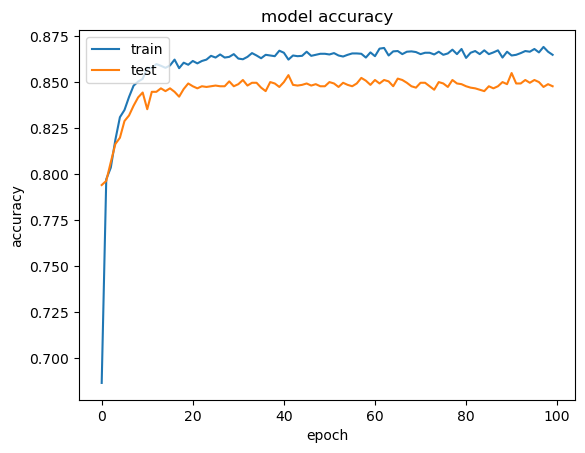

In [41]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

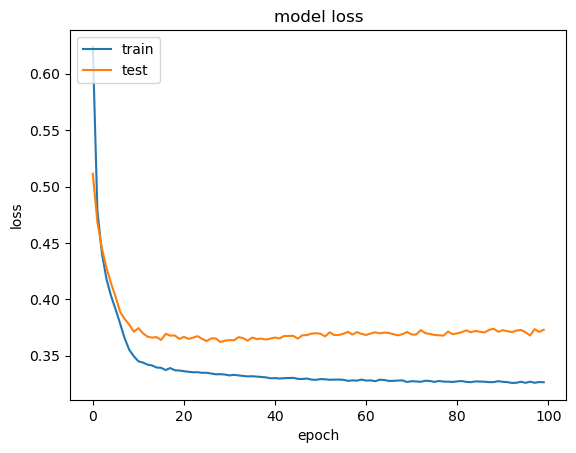

In [42]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part-3 Making the Predictions and evaluating the model

In [43]:
#predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [45]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[1502,   93],
       [ 202,  203]], dtype=int64)

In [46]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred, Y_test)
score

0.8525

In [56]:
#adding more hidden layers
classifier.add(Dense(units = 10, kernel_initializer='he_normal', activation='relu', input_dim=11))
classifier.add(Dropout(0.3))

In [57]:
classifier.add(Dense(units = 20, kernel_initializer='he_normal', activation='relu', input_dim=11))
classifier.add(Dropout(0.4))

In [58]:
#adding third layer
classifier.add(Dense(units = 15, kernel_initializer='he_normal', activation='relu', input_dim=11))
classifier.add(Dropout(0.2))

In [59]:
classifier.add(Dense(units = 1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [60]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
model_history=classifier.fit(X_train, Y_train, validation_split = 0.33, batch_size = 10, epochs = 100)

Epoch 1/100


C:\Users\Lenovo\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


536/536 [==============================] - 5s 6ms/step - loss: 0.4435 - accuracy: 0.8440 - val_loss: 0.3708 - val_accuracy: 0.8569
Epoch 2/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3745 - accuracy: 0.8531 - val_loss: 0.3642 - val_accuracy: 0.8538
Epoch 3/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3694 - accuracy: 0.8539 - val_loss: 0.3649 - val_accuracy: 0.8565
Epoch 4/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3656 - accuracy: 0.8520 - val_loss: 0.3631 - val_accuracy: 0.8501
Epoch 5/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3619 - accuracy: 0.8543 - val_loss: 0.3641 - val_accuracy: 0.8493
Epoch 6/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3557 - accuracy: 0.8572 - val_loss: 0.3627 - val_accuracy: 0.8493
Epoch 7/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3516 - accuracy: 0.8597 - val_loss: 0.3707 - val_accuracy: 0.8489
Epoch 8/100

In [62]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[1571,   24],
       [ 252,  153]], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred, Y_test)
score

0.862